# Data
Import and choosing features and Targets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data


data = load_data('Auto')

feature_names = ['horsepower', 'weight', 'acceleration']
X, y = data[feature_names],data['mpg']

X

,horsepower,weight,acceleration
name,,,
chevrolet chevelle malibu,130,3504,12.0
buick skylark 320,165,3693,11.5
plymouth satellite,150,3436,11.0
amc rebel sst,150,3433,12.0
ford torino,140,3449,10.5
...,...,...,...
ford mustang gl,86,2790,15.6
vw pickup,52,2130,24.6
dodge rampage,84,2295,11.6


## Data split

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


x_train

,horsepower,weight,acceleration
name,,,
dodge aspen,110,3620,18.7
capri ii,92,2572,14.9
ford pinto,97,2984,14.5
plymouth fury iii,150,4135,13.5
plymouth champ,64,1875,16.4
...,...,...,...
amc matador (sw),150,3892,12.5
amc gremlin,100,2789,15.0
oldsmobile starfire sx,85,2855,17.6


# Data visualisation

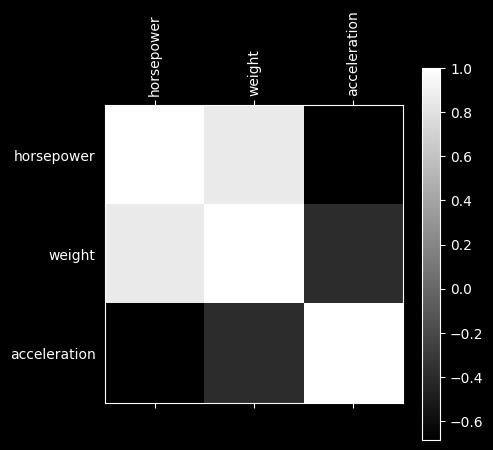

Variance
horsepower       38.283669
weight          841.133957
acceleration      2.817864
dtype: float64


,horsepower,weight,acceleration
horsepower,1.000000,0.856179,-0.685944
weight,0.856179,1.000000,-0.392906
acceleration,-0.685944,-0.392906,1.000000


In [3]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

print('Variance')
print(df_features.std())
corr_mtx

# Plotting

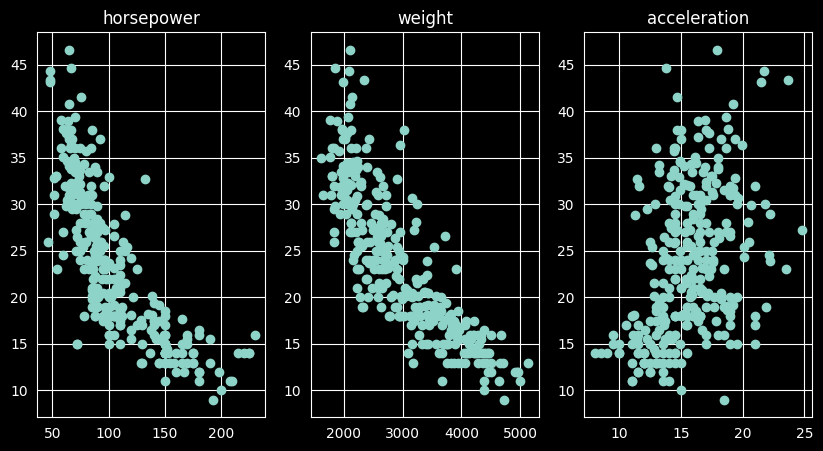

In [4]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

for idx,name in enumerate(feature_names):
    ax[idx].title.set_text(name)
    ax[idx].scatter(x_train[name], y_train, label=name)

plt.show()

## Conclusions
#### First:
Weight is strongly correlated with horsepower
#### Second:
relation seems to be quadratic function

## Dropping weight column

In [5]:
x_train = x_train.drop('weight', axis=1, errors='ignore')
x_test = x_test.drop('weight', axis=1, errors='ignore')

x_train

,horsepower,acceleration
name,,
dodge aspen,110,18.7
capri ii,92,14.9
ford pinto,97,14.5
plymouth fury iii,150,13.5
plymouth champ,64,16.4
...,...,...
amc matador (sw),150,12.5
amc gremlin,100,15.0
oldsmobile starfire sx,85,17.6


# Model

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('regressor', LinearRegression(fit_intercept=False))])

pipeline

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('regressor', LinearRegression(fit_intercept=False))])

In [7]:
x = np.array([2])
print(x_train)
print(PolynomialFeatures(degree=2).fit_transform(x_train))

                        horsepower  acceleration
name                                            
dodge aspen                    110          18.7
capri ii                        92          14.9
ford pinto                      97          14.5
plymouth fury iii              150          13.5
plymouth champ                  64          16.4
...                            ...           ...
amc matador (sw)               150          12.5
amc gremlin                    100          15.0
oldsmobile starfire sx          85          17.6
ford escort 2h                  65          20.7
chevrolet impala               150          14.0

[313 rows x 2 columns]
[[1.0000e+00 1.1000e+02 1.8700e+01 1.2100e+04 2.0570e+03 3.4969e+02]
 [1.0000e+00 9.2000e+01 1.4900e+01 8.4640e+03 1.3708e+03 2.2201e+02]
 [1.0000e+00 9.7000e+01 1.4500e+01 9.4090e+03 1.4065e+03 2.1025e+02]
 ...
 [1.0000e+00 8.5000e+01 1.7600e+01 7.2250e+03 1.4960e+03 3.0976e+02]
 [1.0000e+00 6.5000e+01 2.0700e+01 4.2250e+03 1.3455e+03 4

## Model training and evaluation

### Metric func

In [8]:
from sklearn.metrics import mean_squared_error, r2_score


def metric(y_hat, y_true):
    score = pd.DataFrame({
        'MSE': [mean_squared_error(y_true, y_hat)],
        'RMSE':[np.sqrt(mean_squared_error(y_true, y_hat))],
        'R2': [r2_score(y_true, y_hat)],
    })

    return score

### Training and testing

In [9]:
pipeline.fit(x_train, y_train)
metric(pipeline.predict(x_test), y_test)

,MSE,RMSE,R2
0,17.276043,4.156446,0.661523


# Plotting results

[ 8.54718300e+01 -6.05968931e-01 -1.59356019e+00  1.47722965e-03
  2.45653726e-03  1.66195866e-02]


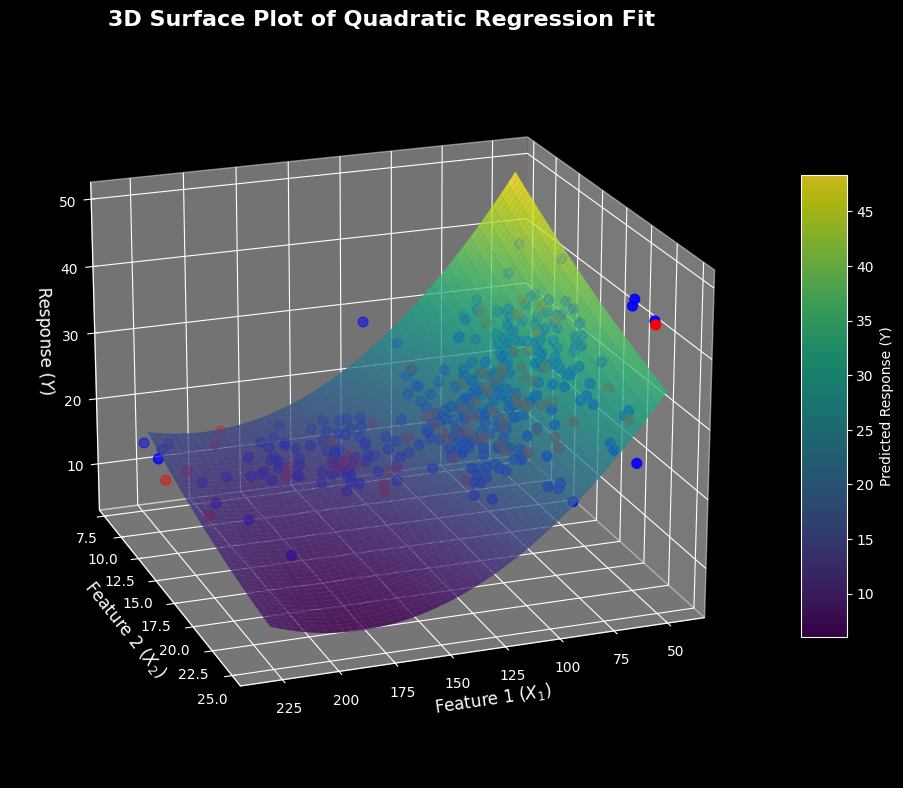

In [10]:
regressor = pipeline.named_steps['regressor']
coefficients = regressor.coef_.ravel()


print(coefficients)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necessary for 3D plots



def quadratic_surface(X1, X2, coefs):
    b, b1, b2, a1, m, a2 = coefs
    return b + (b1 * X1) + (b2 * X2) + (a1 * X1**2) + (a2 * X2**2) + m*X1*X2






x1, x2 = x_test['horsepower'], x_test['acceleration']
X1_min, X1_max = min(x1), max(x1)
X2_min, X2_max = min(x2), max(x2)


grid_points = 50
X1_grid = np.linspace(X1_min, X1_max, grid_points)
X2_grid = np.linspace(X2_min, X2_max, grid_points)

X1, X2 = np.meshgrid(X1_grid, X2_grid)


Z_predicted = quadratic_surface(X1, X2, coefficients)

# --- 4. Plotting the 3D Surface ---

fig = plt.figure(figsize=(12, 10))
# Tell matplotlib this is a 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(
    X1, X2, Z_predicted,
    cmap='viridis',      # Color map (e.g., 'viridis', 'coolwarm')
    edgecolor='none',    # No lines between grid squares
    alpha=0.8            # Slight transparency
)

# Add a color bar to show the height (Response Y)
fig.colorbar(surface, shrink=0.6, aspect=10, label='Predicted Response (Y)')

# --- 5. Add Labels, Title, and View Angle ---

ax.set_title('3D Surface Plot of Quadratic Regression Fit', fontsize=16, fontweight='bold')
ax.set_xlabel('Feature 1 ($X_1$)', fontsize=12)
ax.set_ylabel('Feature 2 ($X_2$)', fontsize=12)
ax.set_zlabel('Response ($Y$)', fontsize=12)

# Adjust the viewing angle for better visualization (optional)
ax.view_init(elev=20, azim=70) # Elev=elevation, Azim=azimuth (rotation)

ax.scatter(
    x_train['horsepower'],
    x_train['acceleration'],
    y_train,
    color='blue',
    s=50, # Size of markers
    label='Observed Data Points',
    zorder=10 # Ensures points are rendered on top of the surface
)


ax.scatter(
    x1,
    x2,
    y_test,
    color='red',
    s=50, # Size of markers
    label='Observed Data Points',
    zorder=10 # Ensures points are rendered on top of the surface
)


# Display the plot
plt.show()

# coef analysis

In [11]:
import statsmodels.regression.linear_model as st


x_poly_train = PolynomialFeatures(degree=2).fit_transform(x_train)
model = st.OLS(y_train, x_poly_train)
results = model.fit()
print(results.summary())

print(coefficients)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           3.14e-87
Time:                        15:47:47   Log-Likelihood:                -882.74
No. Observations:                 313   AIC:                             1777.
Df Residuals:                     307   BIC:                             1800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4718     16.613      5.145      0.0

# Dropping out not important features

In [12]:
new_x_train = x_train.drop('acceleration', axis=1, errors='ignore')
new_x_test = x_test.drop('acceleration', axis=1, errors='ignore')

pipeline.fit(new_x_train, y_train)
preds = pipeline.predict(new_x_test)

metric(preds, y_test)

,MSE,RMSE,R2
0,18.416968,4.291499,0.63917


# Yet another model (more complicated)

In [13]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)
preds = model.predict(x_test)
metric(preds, y_test)

,MSE,RMSE,R2
0,17.424862,4.17431,0.658608


# Optuna

In [14]:
import optuna
from sklearn.model_selection import KFold, cross_val_score


def objective_svr(trial):
    # Model Params
    C = trial.suggest_float("C", 0.01, 1)
    epsilon = trial.suggest_float("epsilon", 0.001, 0.01)
    # kernel = trial.suggest_categorical('regressor__kernel', ['poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical("gamma", ['scale', 'auto'])

    model = SVR(C=C, epsilon=epsilon, gamma=gamma)
    cv = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(model, x_train, y_train, cv=cv, scoring= 'neg_mean_squared_error').mean()

    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective_svr, n_trials=30, show_progress_bar=True)
print(study.best_params)
model = SVR(**study.best_params)
model.fit(x_train, y_train)
preds = model.predict(x_test)

metric(preds, y_test)

[I 2025-12-10 15:47:48,112] A new study created in memory with name: no-name-c39237aa-48c7-409b-9cd4-1c498a128500


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-12-10 15:47:48,161] Trial 0 finished with value: -24.857186772531282 and parameters: {'C': 0.2740762103435126, 'epsilon': 0.008987329808620319, 'gamma': 'scale'}. Best is trial 0 with value: -24.857186772531282.
[I 2025-12-10 15:47:48,198] Trial 1 finished with value: -24.92615552357393 and parameters: {'C': 0.2757094006900317, 'epsilon': 0.008914857524794845, 'gamma': 'scale'}. Best is trial 0 with value: -24.857186772531282.
[I 2025-12-10 15:47:48,236] Trial 2 finished with value: -37.24522526197765 and parameters: {'C': 0.09215882547396621, 'epsilon': 0.005645137840191023, 'gamma': 'scale'}. Best is trial 0 with value: -24.857186772531282.
[I 2025-12-10 15:47:48,268] Trial 3 finished with value: -21.820607659111197 and parameters: {'C': 0.4477878583127217, 'epsilon': 0.009433531290032677, 'gamma': 'scale'}. Best is trial 3 with value: -21.820607659111197.
[I 2025-12-10 15:47:48,304] Trial 4 finished with value: -59.30391904917955 and parameters: {'C': 0.2466971221694724, 'ep

,MSE,RMSE,R2
0,17.395612,4.170805,0.659181
